In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, RepeatedKFold
from xgboost import XGBRegressor

In [6]:
df=pd.read_csv('Steel_industry_data.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [7]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [ ]:
df.info()

In [9]:
df.isna().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [10]:
df['Year']=pd.to_datetime(df['date'],format="%d/%m/%Y %H:%M").dt.year
df['Month']=pd.to_datetime(df['date'],format="%d/%m/%Y %H:%M").dt.month

In [11]:
df.tail()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Year,Month
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load,2018,12
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load,2018,12
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load,2018,12
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load,2018,12
35039,31/12/2018 00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load,2018,12


In [12]:
#sns.pairplot(df)

In [13]:
df['WeekStatus'].replace(to_replace="Weekday",value=0,inplace=True)
df['WeekStatus'].replace(to_replace="Weekend",value=1,inplace=True)
df['Day_of_week'].replace(to_replace="Monday",value=0,inplace=True)
df['Day_of_week'].replace(to_replace="Tuesday",value=1,inplace=True)
df['Day_of_week'].replace(to_replace="Wednesday",value=2,inplace=True)
df['Day_of_week'].replace(to_replace="Thursday",value=3,inplace=True)
df['Day_of_week'].replace(to_replace="Friday",value=4,inplace=True)
df['Day_of_week'].replace(to_replace="Saturday",value=5,inplace=True)
df['Day_of_week'].replace(to_replace="Sunday",value=6,inplace=True)
df['Load_Type'].replace(to_replace="Light_Load",value=0,inplace=True)
df['Load_Type'].replace(to_replace="Medium_Load",value=1,inplace=True)
df['Load_Type'].replace(to_replace="Maximum_Load",value=2,inplace=True)

In [14]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'Year', 'Month'],
      dtype='object')

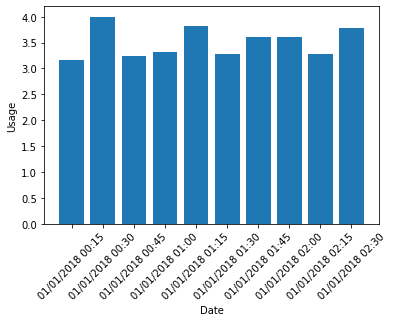

In [15]:
#sns.barplot(df.head()['date'],df['Usage_kWh'],color='g')
plt.bar(df.head(10)['date'],df.head(10)['Usage_kWh'])
  
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Usage")
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Usage_kWh'>

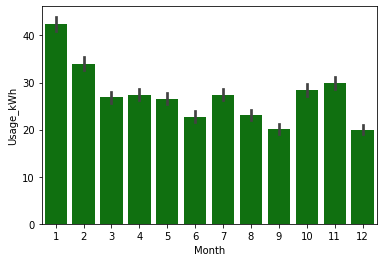

In [16]:
sns.barplot(df['Month'],df['Usage_kWh'],color='g')

In [17]:
df['date']=df.index
df.drop(['date'],axis=1,inplace=True)
df.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'Year', 'Month'],
      dtype='object')

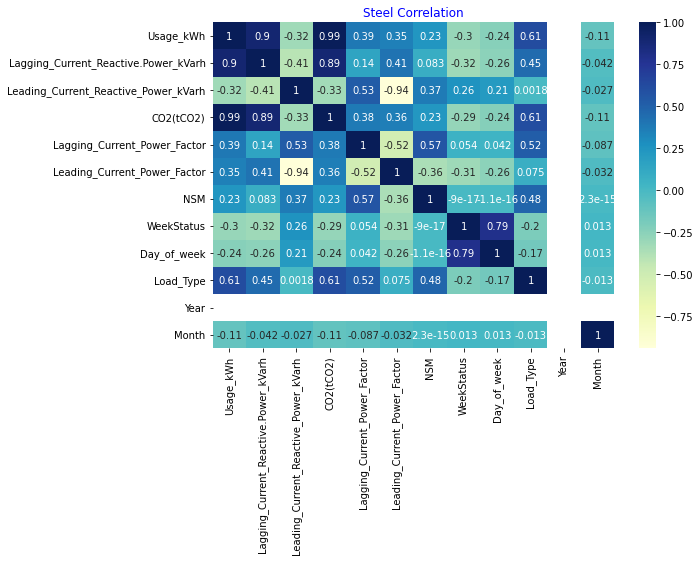

In [18]:
corr=df.corr()
plt.figure(figsize = (9,6))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.title("Steel Correlation", color = 'b')
plt.show()

In [ ]:
df.drop(['Year'],axis=1,inplace=True)
for col in df:
    maxV=abs(corr[col]).nlargest(n=5)
    print(maxV)
    for index,value in maxV.items():
        if 1>value>=0.8:
            print(index,' ile ',col,'değişkenleri yüksek korelasyona sahip',value)

In [20]:
X = df.drop(['Usage_kWh','CO2(tCO2)'],axis=1)
y = df['Usage_kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28032, 9)
(7008, 9)
(28032,)
(7008,)


In [249]:
X_test.head()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Month
11356,3.82,0.0,60.20,100.00,26100,1,6,0,4
26543,48.02,0.0,78.46,100.00,43200,0,3,2,10
2445,59.65,0.0,89.61,100.00,41400,0,4,2,1
14649,0.00,16.6,100.00,18.53,52200,1,5,0,6
32699,20.99,0.0,94.19,100.00,54000,0,4,1,12


In [250]:
y_test.head()

11356      2.88
26543     60.77
2445     120.42
14649      3.13
32699     58.86
Name: Usage_kWh, dtype: float64

In [251]:
#sns.lineplot(x='Leading_Current_Reactive_Power_kVarh',y='Usage_kWh',data=df)

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
nn = MLPRegressor(hidden_layer_sizes=(20, 20, 20, 20), max_iter=1000, verbose=1, activation='relu')
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
print('R^2 Score : ',r2_score(y_test,y_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
#print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error : ', mean_absolute_percentage_error(y_test, y_pred))

Iteration 1, loss = 693.72146333
Iteration 2, loss = 50.09436649
Iteration 3, loss = 18.97162609
Iteration 4, loss = 11.27282780
Iteration 5, loss = 8.62265723
Iteration 6, loss = 7.27936819
Iteration 7, loss = 6.35232127
Iteration 8, loss = 5.68101823
Iteration 9, loss = 5.11527239
Iteration 10, loss = 4.54489989
Iteration 11, loss = 4.06244432
Iteration 12, loss = 3.66932884
Iteration 13, loss = 3.29195627
Iteration 14, loss = 3.02996164
Iteration 15, loss = 2.79613681
Iteration 16, loss = 2.65232046
Iteration 17, loss = 2.50104022
Iteration 18, loss = 2.30712044
Iteration 19, loss = 2.19565018
Iteration 20, loss = 2.09165662
Iteration 21, loss = 2.08964077
Iteration 22, loss = 1.92834839
Iteration 23, loss = 1.83337591
Iteration 24, loss = 1.76785532
Iteration 25, loss = 1.73224794
Iteration 26, loss = 1.65843400
Iteration 27, loss = 1.60192387
Iteration 28, loss = 1.52003031
Iteration 29, loss = 1.47273129
Iteration 30, loss = 1.45282704
Iteration 31, loss = 1.39988343
Iteration 32

In [252]:
#Random Forest Regressor
import math
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print('R^2 Score : ',r2_score(y_test,y_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error : ', mean_absolute_percentage_error(y_test, y_pred))
#MAPE=0.009

R^2 Score :  0.9994775815613763
Mean Absolute Error :  0.26259775970319643
Mean Squared Error :  0.5938447088627283
Root Mean Squared Error :  0.7706132031458638
Mean Absolute Percentage Error :  0.010172711288644741


In [253]:
predict_df=pd.DataFrame({"y_test":y_test,"y_pred":y_pred,"sub":abs(y_test-y_pred)})
predict_df

,y_test,y_pred,sub
11356,2.88,2.8872,7.200000e-03
26543,60.77,60.6043,1.657000e-01
2445,120.42,120.4960,7.600000e-02
14649,3.13,3.1240,6.000000e-03
32699,58.86,58.7107,1.493000e-01
...,...,...,...
9044,3.17,3.1712,1.200000e-03
15276,2.92,2.9200,2.664535e-15
3023,145.51,135.7353,9.774700e+00
32096,3.71,3.6728,3.720000e-02


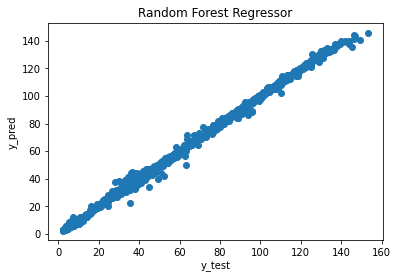

In [254]:
plt.scatter(y_test,y_pred)
plt.title("Random Forest Regressor")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [255]:
prediction=regressor.predict([[3.82,0.0,60.20,100.00,26100,1,6,0,4]])
print('Enerji tüketimi',prediction,' olarak tahmin edildi.')

Enerji tüketimi [2.8872]  olarak tahmin edildi.


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [256]:
regressor2 = LinearRegression()
regressor2.fit(X_train, y_train)
y_pred=regressor2.predict(X_test)

In [257]:
#Linear Regression
print('R^2 Score : ',r2_score(y_test,y_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error : ', mean_absolute_percentage_error(y_test, y_pred))

R^2 Score :  0.9144063154117025
Mean Absolute Error :  6.983654981086712
Mean Squared Error :  97.29625324623396
Root Mean Squared Error :  9.863886315557066
Mean Absolute Percentage Error :  0.8371409492468562


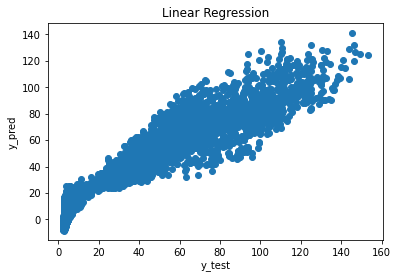

In [258]:
plt.scatter(y_test,y_pred)
plt.title("Linear Regression")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [259]:
#label encoding for logistic regression
from sklearn import preprocessing, utils
lab_enc = preprocessing.LabelEncoder()
transformed_y = lab_enc.fit_transform(y_train)
#print(transformed_y)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(transformed_y))

continuous
multiclass
multiclass


In [287]:
regressor3 = LogisticRegression()
regressor3.fit(X_train, transformed_y)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [288]:
#Logistic Regression
y_pred=regressor3.predict(X_test)
print('R^2 Score : ',r2_score(y_test,y_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error : ',mean_absolute_percentage_error(y_test,y_pred))
#R^2 hatasının negatif olması, modelin (logistic regression) hedef değerlerin ortalamasından daha kötü tahmin yaptığını gösteriyor.

R^2 Score :  -0.08425651762944497
Mean Absolute Error :  26.829307933789956
Mean Squared Error :  1232.4986034960048
Root Mean Squared Error :  35.1069594738138
Mean Absolute Percentage Error :  2.75103499446852


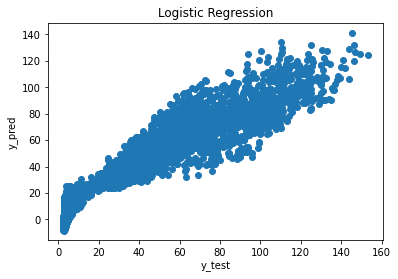

In [262]:
plt.scatter(y_test,y_pred)
plt.title("Logistic Regression")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [263]:
#Ridge Regression
from sklearn.linear_model import Ridge,Lasso
r=Ridge(alpha=0.0001)
r.fit(X_train,y_train)
y_pred=r.predict(X_test)
print('R^2 Score : ',r2_score(y_test,y_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error : ',mean_absolute_percentage_error(y_test,y_pred))
#Ridge Regresyon Modeli alpha=0.0001 iken Lineer Regresyon Modeli ile aynı sonuçları vermiştir.

R^2 Score :  0.9144063154060139
Mean Absolute Error :  6.98365498043591
Mean Squared Error :  97.29625325270028
Root Mean Squared Error :  9.863886315884844
Mean Absolute Percentage Error :  0.8371409493695353


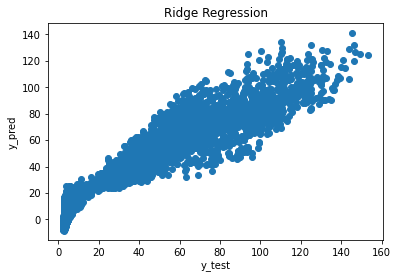

In [264]:
plt.scatter(y_test,y_pred)
plt.title("Ridge Regression")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [265]:
#Lasso Regression
r2=Lasso(alpha=0.0001)
r2.fit(X_test,y_test)
y_pred=r2.predict(X_test)
print('R^2 Score : ',r2_score(y_test,y_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error : ',mean_absolute_percentage_error(y_test,y_pred))

R^2 Score :  0.9145536707928865
Mean Absolute Error :  7.032546905627398
Mean Squared Error :  97.1287510928468
Root Mean Squared Error :  9.855391980679753
Mean Absolute Percentage Error :  0.8609572694975473


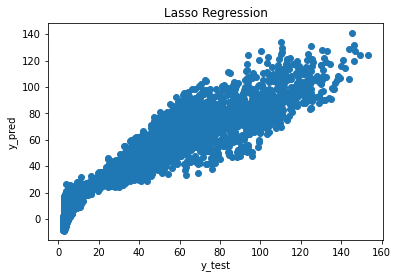

In [266]:
plt.scatter(y_test,y_pred)
plt.title("Lasso Regression")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

Lasso ve Ridge Lineer Regresyon Modellerinde (alpha=0.0001); r^2'de 0.001 farkla MAPE'de 0.03 farkla Lasso Regresyon Modeli, Ridge Regresyon modeline göre daha iyi sonuç vermiştir.

In [267]:
#KNN REGRESSOR
from sklearn.neighbors import KNeighborsRegressor
r3=KNeighborsRegressor(n_neighbors=3)
r3.fit(X_train,y_train)
y_pred=r3.predict(X_test)
print('R^2 Score : ',r2_score(y_test,y_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error : ',mean_absolute_percentage_error(y_test,y_pred))
#KNN modeli için; n_neighbors=3 iken r^2 değeri 0.98 ile, MAPE 0.079 ile en iyi sonuçları vermiştir.

R^2 Score :  0.9803616198753422
Mean Absolute Error :  2.102224124809741
Mean Squared Error :  22.323385365930996
Root Mean Squared Error :  4.724762995741797
Mean Absolute Percentage Error :  0.0797372612575788


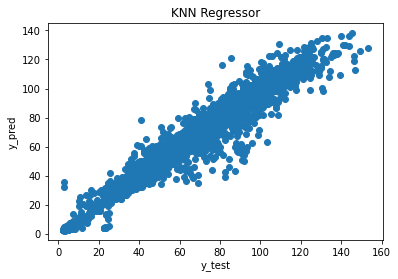

In [268]:
plt.scatter(y_test,y_pred)

plt.title("KNN Regressor")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [286]:
#Linear Support Vector Regressor
from sklearn.svm import LinearSVR
model=LinearSVR()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('R^2 Score : ',r2_score(y_test,y_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error : ',mean_absolute_percentage_error(y_test,y_pred))

R^2 Score :  0.8345362316190617
Mean Absolute Error :  9.25960295924024
Mean Squared Error :  188.08636161538786
Root Mean Squared Error :  13.714458123286821
Mean Absolute Percentage Error :  0.8395315971156778


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


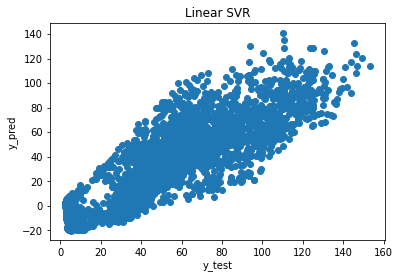

In [270]:
plt.scatter(y_test,y_pred)
plt.title("Linear SVR")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [271]:
import xgboost as xgb
from xgboost import plot_tree
xgb_r = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 100, seed = None)
 
xgb_r.fit(X_train, y_train)
y_pred =xgb_r.predict(X_test)

print('R^2 Score : ',r2_score(y_test,y_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error : ',mean_absolute_percentage_error(y_test,y_pred))
#R^2=0.999 ve MAPE=0.025

[22:10:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
R^2 Score :  0.999235038350186
Mean Absolute Error :  0.47926973081070534
Mean Squared Error :  0.8695489949048182
Root Mean Squared Error :  0.9324961098604209
Mean Absolute Percentage Error :  0.025995443083522616


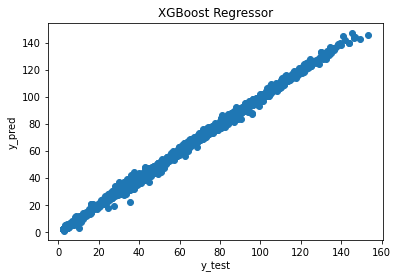

In [272]:
plt.scatter(y_test,y_pred)
plt.title("XGBoost Regressor")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

Veri seti için uygulamış olduğum modeller arasında değerlendirme metrikleri sonucunda r^2=0.999, MAPE=0.01 ile Random Forest Regressor en iyi sonucu vermiştir. İkinci en iyi sonuç veren algoritma r^2 değerleri aynı olmakla birlikte MAPE değeri 0.15 daha yüksek olan XGBoost Regressor'dur.

In [273]:
#from sklearn.svm import SVR
#svr_rbf = SVR(kernel='rbf',C=1e3, gamma=0.1)
#svr_rbf.fit(X_train, y_train)
#y_rbf =svr_rbf.predict(X_test)

In [274]:
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
#svr_poly.fit(X_train, y_train)
#y_poly = svr_poly.predict(X_test)

In [275]:
#print('R^2 Score : ',r2_score(y_test,y_rbf))
#print('R^2 Score : ',r2_score(y_test,y_lin))
#print('R^2 Score : ',r2_score(y_test,y_poly))

In [276]:
#plt.scatter(X_train, y_train, color='darkorange', label='data')
#plt.hold('on')
#plt.plot(X_train, y_rbf, color='navy', lw=2, label='RBF model')
#plt.plot(X_train, y_lin, color='c', lw=2, label='Linear model')
#plt.plot(X_train, y_poly, color='cornflowerblue', lw=2, label='Polynomial model')
#plt.xlabel('Data')
#plt.ylabel('Target')
#plt.title('Support Vector Regression')
#plt.legend()
#plt.show()